<a href="https://colab.research.google.com/github/cvillanue/Bellman-Equation/blob/main/Bellman_EquationProgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bellman Equation (Reinforcement Learning) 
The Bellman equation shows up everywhere in the Reinforcement Learning literature, being one of the central elements of many Reinforcement Learning algorithms. In summary, we can say that the Bellman equation decomposes the value function into two parts, the immediate reward plus the discounted future values

what the Bellman function will allow us to write an equation that will represent our State-Value Function $V^\pi(s)$ as a recursive relationship between the value of a state and the value of its successor states. This equation simplifies the computation of the value function, such that rather than summing over multiple time steps, we can find the optimal solution of a complex problem by breaking it down into simpler, recursive subproblems and finding their optimal solutions.

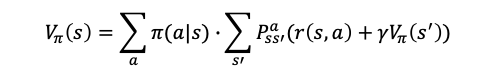



In [1]:
#Bellman Equation program - Callyn 
import numpy as np

reward = [    [1, -10, -10, -10],
    [1, -1, -1, -1],
    [10, -10, -10, -1],
    [1, 1, 1, -1],
]

discount_factor = 1
tolerance = 1e-4
reward = np.array(reward)
terminal = np.zeros((4, 4))
terminal[0, 0] = 1

value = np.zeros((4, 4))
policy = np.full((4, 4, 4), 0.25)
states = [(i, j) for i in range(4) for j in range(4)]


def trans(state, action):
    i, j = state
    di, dj = [(-1, 0), (1, 0), (0, -1), (0, 1)][action]
    return tuple(max(min(k, 3), 0) for k in (i + di, j + dj))


while True:
    new_value = np.array(value)
    for s in states:
        v = 0
        for a in range(4):
            s1 = trans(s, a)
            v += policy[s + (a,)] * (reward[s1] + discount_factor * (1 - terminal[s1]) * value[s1])
        new_value[s] = v
    if np.abs(value - new_value).sum() <= tolerance:
        break
    value = new_value

np.set_printoptions(precision=5)
print(value)


[[ -39.9999   -90.33909 -143.44613 -166.28537]
 [ -62.66052 -107.57116 -142.71395 -158.12463]
 [ -91.41041 -114.5711  -139.71392 -152.37461]
 [ -98.99965 -119.58892 -138.19604 -146.28531]]


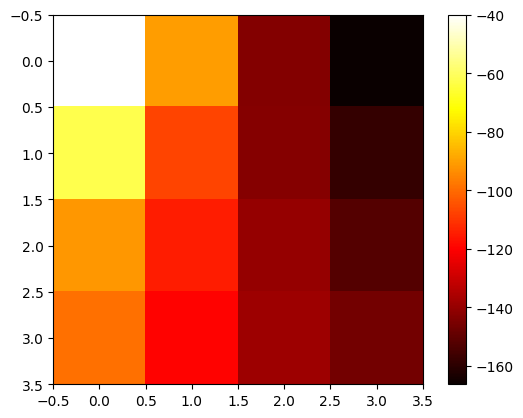

In [2]:
import matplotlib.pyplot as plt

# computing the optimal value function
while True:
    new_value = np.array(value)
    for s in states:
        v = 0
        for a in range(4):
            s1 = trans(s, a)
            v += policy[s + (a,)] * (reward[s1] + discount_factor * (1 - terminal[s1]) * value[s1])
        new_value[s] = v
    if np.abs(value - new_value).sum() <= tolerance:
        break
    value = new_value

# Plot the value function as a heatmap
plt.imshow(value, cmap='hot')
plt.colorbar()
plt.show()